In [1]:
%matplotlib inline
import os
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
class Animal(object):
    def __repr__(self):
        return self.name
    
    def __init__(self, name, noise):
        self.name = name
        self.noise = noise
        
    def speak(self):
        print(self.noise)

In [3]:
my_animal = Animal('bob', 'hi')
your_animal = Animal('Woolhelmina', 'BAAA')

In [4]:
dir(my_animal)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'name',
 'noise',
 'speak']

In [5]:
print(my_animal)
print(your_animal)

bob
Woolhelmina


In [6]:
my_animal.__repr__()

'bob'

In [7]:
animallist = [my_animal, your_animal]
print(animallist)

for animal in animallist:
    animal.speak()

[bob, Woolhelmina]
hi
BAAA


-----------------------------------------------------------------

In [8]:
def formatstring(myfloat):
    return '%.5f'%myfloat

def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [9]:
class Planet():
    def __repr__(self):
        return self.name
    
    def __init__(
        self,
        name,
        mass, mass_unc,
        radius, radius_unc,
        datadir,
        mpList,
        fList,
        orbitalList,
        entropyList,
        **kwargs
    ):
        self.name = name
        self.mass = mass
        self.mass_unc = mass_unc
        self.radius = radius
        self.radius_unc = radius_unc
        self.datadir = datadir
        self.mpList = mpList
        self.fList = fList
        self.orbitalList = orbitalList
        self.entropyList = entropyList 
        
        if len(kwargs.keys()):
            print(kwargs)
        
        self.fnames = self.format_file_names()
        
        self.grid_masses, self.grid_radii, self.grid_fs, self.grid_ages = self.load_models(self.fnames)
        
        
    def format_file_names(self,formatter=None):
        if formatter is None:
            formatter = formatstring
        
        fnames = []
        for i, m in enumerate(self.mpList):
            ent = self.entropyList[i]
            
            for k, orbital in enumerate(self.orbitalList):
                for j, f in enumerate(self.fList):
                    fname = self.datadir + '/hist_evolve_%s_%s_0.24000_0.02000_%s_%s_0.10000.data'%(
                        formatter(m),
                        formatter(f),
                        formatter(orbital),
                        formatter(ent)
                    )
                    fnames.append(fname)
                    
        return fnames
    
    
    def load_models(self,fnames,loud=False):
        masses = []
        radii = []
        fs = []
        ages = []
        
        max_len = 0
        
        for i, fname in enumerate(fnames):
            ## TODO validate data from history file for
            ##  edge cases that seem to be broken...?
            h = mr.MesaData(fname,file_type='log')
            if loud:
                print(fname)
            
            masses.append(h.star_mass*mfrac)
            radii.append(h.radius*rfrac)
            fs.append(envelope_fraction(h))
            ages.append(h.star_age)
            
            if len(h.star_age) > max_len:
                max_len = len(h.star_age)
        
        arrays = [masses, radii, fs, ages]
        square_arrays = [np.zeros((len(fnames),max_len))+np.nan for arr in arrays]
        for i, arr in enumerate(arrays):
            for j, model_arr in enumerate(arr):
                this_len = len(model_arr)
                square_arrays[i][j,:this_len] = model_arr
        
        return square_arrays
    
    
        

In [10]:
k2146b = Planet('K2-146b',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b_fine',
                mpList=np.arange(5.1, 6.6+0.1, 0.1), 
                fList=np.arange(0.004,0.02+0.001,0.001),
                orbitalList=[0.02584],
                entropyList=[7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23, 
                             7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26]
               )

#k2146c = Planet('K2-146c',7.50, 0.23, 2.19, 0.07)

In [11]:
print(k2146b.grid_masses)

[[5.09999999 5.09999727 5.09999434 ...        nan        nan        nan]
 [5.09999999 5.0999967  5.09999323 ...        nan        nan        nan]
 [5.09999999 5.09999674 5.09999328 ...        nan        nan        nan]
 ...
 [6.6        6.59999721 6.59999386 ...        nan        nan        nan]
 [6.6        6.59999542 6.59998992 ...        nan        nan        nan]
 [6.6        6.59999707 6.59999356 ...        nan        nan        nan]]


In [12]:
arr = np.arange(100).reshape(-1,25)
print(arr)
print('----')
print(arr[[0,1,2,3],[-1,-2,-2,-1]])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24]
 [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
  49]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
  74]
 [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
  99]]
----
[24 48 73 99]


In [13]:
final_indices = np.argmax(np.isnan(k2146b.grid_ages),axis=-1) - 1
#np.argmax(k2146b.grid_masses,axis=-1) - np.argmin(k2146b.grid_masses,axis=-1)
#print(np.argmax(k2146b.grid_ages,axis=-1))
#print(k2146b.grid_masses.shape)

final_masses = k2146b.grid_masses[np.arange(k2146b.grid_masses.shape[0]), final_indices]
#print(final_masses)
#final_ages = k2146b.grid_ages[np.arange(k2146b.grid_ages.shape[0]),final_indices]
#print(final_ages)

9820815002.459877


(6000000000.0, 10000000000.0)

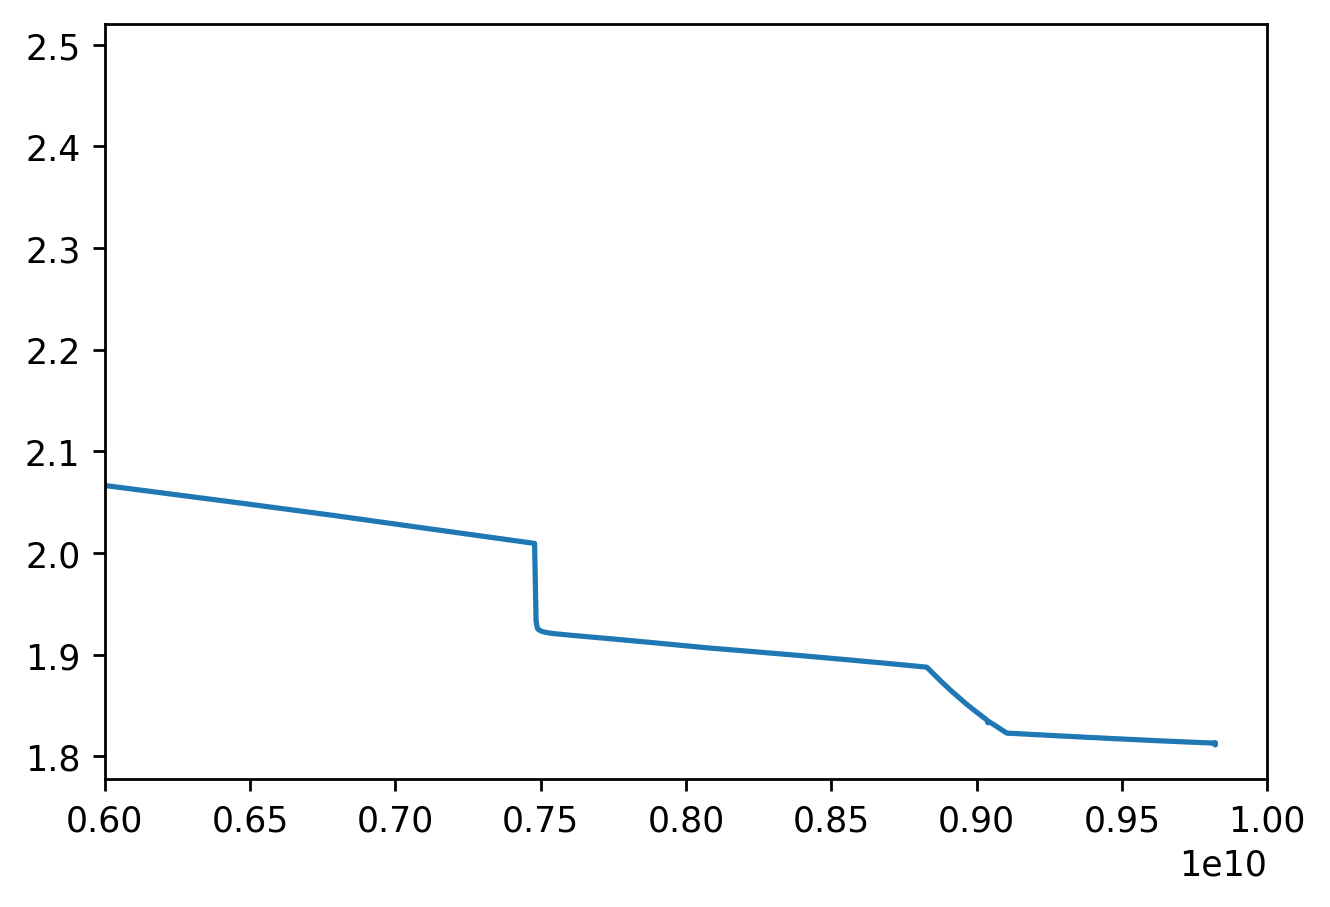

In [14]:
#print(list(k2146b.grid_ages[6]))
#print(np.argmax(k2146b.grid_ages[6]))

plt.plot(k2146b.grid_ages[6,:],k2146b.grid_radii[6,:])
#plt.gca().axhline(0,ls='--',c='r')
plt.gcf().set_dpi(250)
print(k2146b.grid_ages[6,1562])
plt.gca().set_xlim(6e9,1e10)

In [15]:
radius_age_interp = interpolate.interp1d(k2146b.grid_ages[0],k2146b.grid_radii[0],kind='linear')
print(radius_age_interp(3.0e9))

1.9369792217745028


/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


Text(0.5, 1.0, 'All models, before jumps')

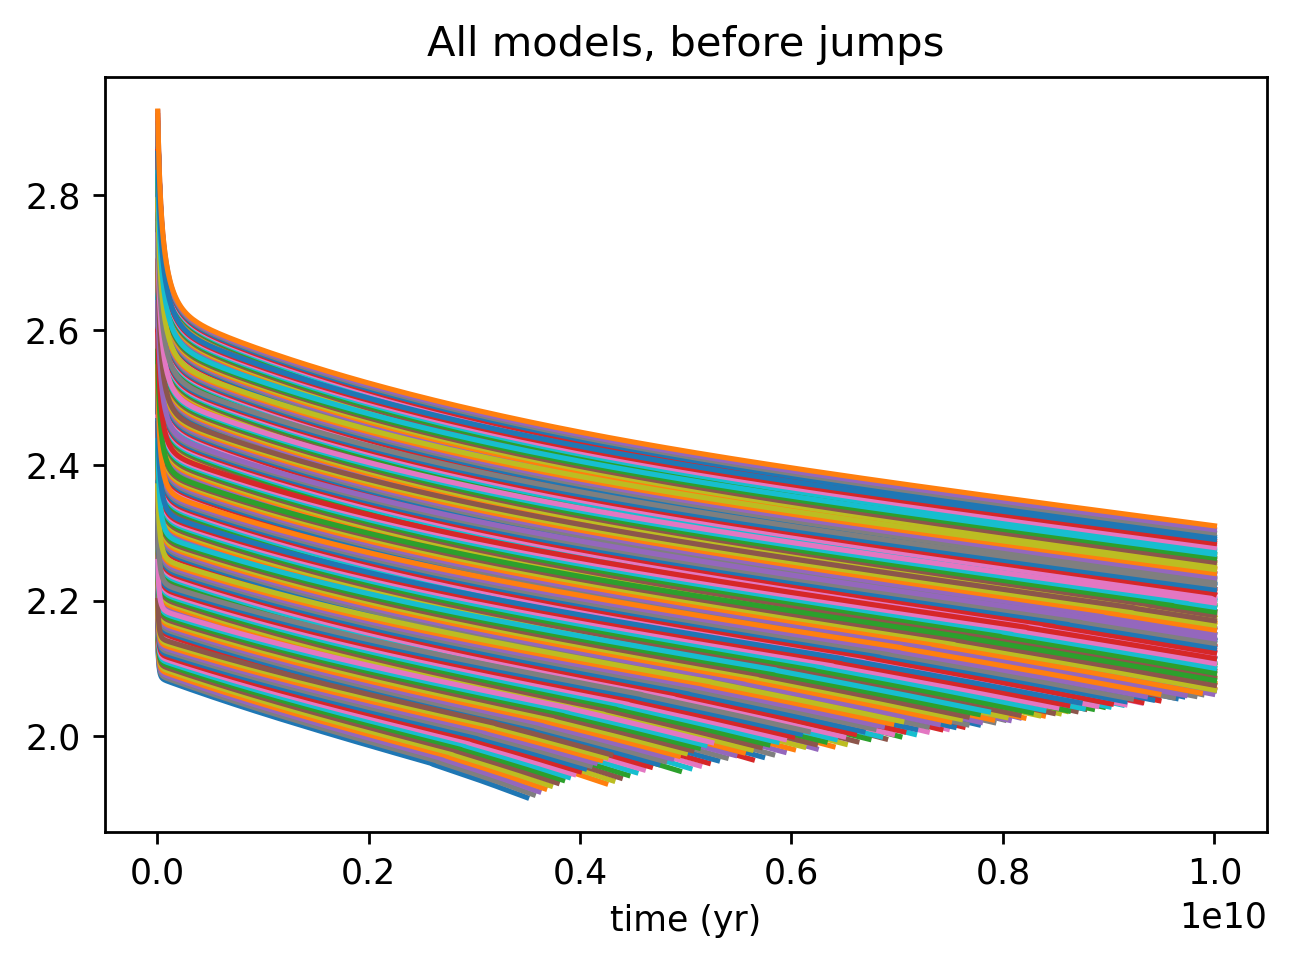

In [22]:
count = 0
for i in range(k2146b.grid_ages.shape[0]):
    foo = k2146b.grid_ages[i,:]
    dts = foo[1:]-foo[:-1]
    drs = k2146b.grid_radii[i,1:] - k2146b.grid_radii[i,:-1]
    
    if determine_if_model_bad(k2146b, i):
        bad_index = determine_where_model_turns_bad(k2146b,i)
    else:
        bad_index = drs.size


    plt.plot(k2146b.grid_ages[i,1:bad_index], k2146b.grid_radii[i,1:bad_index])
    #plt.plot(k2146b.grid_ages[i,1:], drs)
        
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('time (yr)')
#plt.gca().set_ylabel('planet radius (Earth radii)')
plt.gca().set_title('All models, before jumps')
#plt.gca().set_ylim(-0.1,0.02)

In [ ]:
count = 0
for i in range(k2146b.grid_ages.shape[0]):
    foo = k2146b.grid_ages[i,:]
    dts = foo[1:]-foo[:-1]
    if not np.any(dts<0):
        count+=1
        plt.plot(k2146b.grid_ages[i,:], k2146b.grid_radii[i,:])
        #plt.plot(k2146b.grid_ages[i,1:], dts)
        
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('time (yr)')
plt.gca().set_ylabel('planet radius (Earth radii)')
plt.gca().set_title('Models that don\'t go back in time')

In [17]:
def determine_if_model_bad(planet, model_index,dr_thresh=0.02):
    dts = planet.grid_ages[i,1:] - planet.grid_ages[i,:-1]
    drs = planet.grid_radii[i,1:] - planet.grid_radii[i,:-1]
    
    #np.any(dts<0) or 
    return np.any(np.abs(drs)>0.02)


def determine_where_model_turns_bad(planet, model_index,dr_thresh=0.02):
    dts = planet.grid_ages[i,1:] - planet.grid_ages[i,:-1]
    drs = planet.grid_radii[i,1:] - planet.grid_radii[i,:-1]
    
    #np.any(dts<0) or 
    ids = np.argwhere(np.abs(drs)>0.02)
    return ids.flatten()[0]

In [ ]:
not (a and b) -> not a or not b -> either doesnt go back in time or it does and radius only changes a little bit (or both)